<a href="https://colab.research.google.com/github/MangoGrove/MangoGrove.github.io/blob/main/Project/Code/sentiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Area

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import re

In [ ]:
import tqdm

In [ ]:
from transformers import pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pysentimiento
from pysentimiento import create_analyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 13.1 MB/s eta 0:00:00


#Files

In [ ]:
Book_E = "/content/drive/MyDrive/NLPFolder/Work_Sources/English/Don Quixote.txt"
Book_S = "/content/drive/MyDrive/NLPFolder/Work_Sources/Spanish/Don Quijot.txt"

In [ ]:
spanish_text = open(Book_S, 'r').read()
english_text = open(Book_E, 'r').read()

#Pre-Processing

In [ ]:
def extract_gutenberg_text(text):
# should really learn how to read in function from other notebooks
    start_phrase = "*** START OF THE PROJECT GUTENBERG EBOOK"
    #print(start_phrase)
    end_phrase = "*** END OF THE PROJECT GUTENBERG EBOOK "

    lines = text.splitlines()
    start_idx, end_idx = 0, len(lines)

    # Find the start of the actual book (after the START line)
    for i, line in enumerate(lines):
        if start_phrase in line:
            #print(line)
            start_idx = i + 1  # Start *after* the START line
            break

    for i in range(len(lines) - 1, -1, -1):
        if lines[i].upper().startswith(end_phrase):
            #print(lines[i])
            end_idx = i  # Stop *before* the END line
            break

    # Extract and return just the main content
    return "\n".join(lines[start_idx:end_idx]).strip()

In [ ]:
def split_sent(text):
  sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
  return sentences

In [ ]:
def split_paragraph(text):
  paragraphs = re.split(r'\n\n+', text)
  return paragraphs

In [ ]:
def split_chapters (text):
  chapters = re.split(r'CHAPTER\s+', text)
  return chapters

def split_capitulos (text):
  chapters = re.split(r'Capítulo\s+', text)
  return chapters

In [ ]:
print(spanish_text[:-1000])

In [ ]:
print(english_text[:-1000])

In [ ]:
clean_spanish = extract_gutenberg_text(spanish_text)
clean_english = extract_gutenberg_text(english_text)

spanish_chapt = split_capitulos(clean_spanish)
print(len(spanish_chapt))
english_chapt = split_chapters(clean_english)
print(len(english_chapt))

127
253


In [ ]:
english_chapt = english_chapt[126:]

In [ ]:
print(spanish_chapt[1])


primero. Que trata de la condición y ejercicio del famoso hidalgo
don Quijote de la Mancha

En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho
tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua,
rocín flaco y galgo corredor. Una olla de algo más vaca que carnero,
salpicón las más noches, duelos y quebrantos los sábados, lantejas los
viernes, algún palomino de añadidura los domingos, consumían las tres
partes de su hacienda. El resto della concluían sayo de velarte, calzas de
velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de
entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una
ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte,
y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la
podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de
complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo
de la caza. Quieren decir que te

In [ ]:
print(english_chapt[1])

I.
WHICH TREATS OF THE CHARACTER AND PURSUITS OF THE FAMOUS GENTLEMAN DON
QUIXOTE OF LA MANCHA




p007.jpg (150K)

Full Size

In a village of La Mancha, the name of which I have no desire to call
to mind, there lived not long since one of those gentlemen that keep a
lance in the lance-rack, an old buckler, a lean hack, and a greyhound
for coursing. An olla of rather more beef than mutton, a salad on most
nights, scraps on Saturdays, lentils on Fridays, and a pigeon or so
extra on Sundays, made away with three-quarters of his income. The rest
of it went in a doublet of fine cloth and velvet breeches and shoes to
match for holidays, while on week-days he made a brave figure in his
best homespun. He had in his house a housekeeper past forty, a niece
under twenty, and a lad for the field and market-place, who used to
saddle the hack as well as handle the bill-hook. The age of this
gentleman of ours was bordering on fifty; he was of a hardy habit,
spare, gaunt-featured, a very early riser 

In [ ]:
spanish_sentences = split_sent(spanish_chapt[1])
english_sentences = split_sent(english_chapt[1])
print(len(spanish_sentences))
print(len(english_sentences))

37
37


In [ ]:
print(spanish_sentences[3])
print(english_sentences[3])

El resto della concluían sayo de velarte, calzas de
velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de
entresemana se honraba con su vellorí de lo más fino.
The rest
of it went in a doublet of fine cloth and velvet breeches and shoes to
match for holidays, while on week-days he made a brave figure in his
best homespun.


check if the number of sentence is equal in between chapters

#Main Code

* bert



In [ ]:
analyzer_spanish = create_analyzer(task="sentiment", lang="es")

#analyzer.predict("Qué gran jugador es Messi")
result = analyzer_spanish.predict(spanish_sentences[3])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
print(result.output)
print(result.probas)
print(result)
print(result.probas[result.output])
print(type(result))

NEU
{'NEG': 0.06269106268882751, 'NEU': 0.7156175971031189, 'POS': 0.22169139981269836}
AnalyzerOutput(output=NEU, probas={NEU: 0.716, POS: 0.222, NEG: 0.063})
0.7156175971031189
<class 'pysentimiento.analyzer.AnalyzerOutput'>


In [ ]:
sentiment_chapt_esp = {}
spanish_neg = 0
spanish_pos = 0
spanish_neu = 0


for sentence in tqdm.tqdm(spanish_sentences):
  result = analyzer_spanish.predict(sentence)
  sentiment_chapt_esp[sentence] = result #analyzer.predict(sentence).output

  spanish_neg = result.probas['NEG'] + spanish_neg
  spanish_pos = result.probas['POS'] + spanish_pos
  spanish_neu = result.probas['NEU'] + spanish_neu

print(f"Spanish Negativity: {spanish_neg}")
print(f"Spanish Positivity: {spanish_pos}")
print(f"Spanish Neutrality: {spanish_neu}")


100%|██████████| 37/37 [00:21<00:00,  1.75it/s]

Spanish Negativity: 11.41004138533026
Spanish Positivity: 8.938777475617826
Spanish Neutrality: 16.651181153953075


In [ ]:
spanish_neg = spanish_neg/len(spanish_chapt)
spanish_pos = spanish_pos/len(spanish_chapt)
spanish_neu = spanish_neu/len(spanish_chapt)

print(f"Spanish Negativity: {spanish_neg}")
print(f"Spanish Positivity: {spanish_pos}")
print(f"Spanish Neutrality: {spanish_neu}")


Spanish Negativity: 0.08984284555378157
Spanish Positivity: 0.07038407461116399
Spanish Neutrality: 0.13111166262955176


#English Sentiment

* using the spanish trained analyzer

In [ ]:
english_neg = 0
english_pos = 0
enlish_neu = 0

sentiment_chapt_engS = {}

for sentence in tqdm.tqdm(english_sentences):
  result = analyzer_spanish.predict(sentence)
  sentiment_chapt_engS[sentence] = result #analyzer.predict(sentence).output

  english_neg = result.probas['NEG'] + english_neg
  english_pos = result.probas['POS'] + english_pos
  enlish_neu = result.probas['NEU'] + enlish_neu
print()

print(f"English Negativity: {english_neg}")
print(f"English Positivity: {english_pos}")
print(f"English Neutrality: {enlish_neu}")

100%|██████████| 37/37 [00:20<00:00,  1.79it/s]


English Negativity: 12.494403544813395
English Positivity: 9.735079877078533
English Neutrality: 14.770516484975815


In [ ]:
sentiment_chapt_engS[english_sentences[3]].probas["NEU"]

0.4026813507080078

In [ ]:
english_neg = english_neg/len(english_chapt)
english_pos = english_pos/len(english_chapt)
enlish_neu = enlish_neu/len(english_chapt)

print()

print(f"English Negativity: {english_neg}")
print(f"English Positivity: {english_pos}")
print(f"English Neutrality: {enlish_neu}")


English Negativity: 0.09838113027412122
English Positivity: 0.0766541722604609
English Neutrality: 0.11630327940925839


In [ ]:
def create_plot(sentence_es, sentence_en, data_es, data_en, analyzer, plot_title, sentiment_type, function_type):
  #if function_type == "":
  spanish_sent_scores = []
  if function_type != "multi-classifier":
    for sentence in sentence_es:
      spanish_sent_scores.append(data_es[sentence].probas[sentiment_type])

  english_sentence_scores = []
  if function_type == "3Way Spanish":
    for sentence in sentence_en:
      english_sentence_scores.append(data_en[sentence].probas[sentiment_type])
  if function_type == "English Pos":
    #for sentence in sentence_en:
    #  english_sentence_scores.append(data_en[sentence][0]['score'])
    for i, sentence in enumerate(sentence_en):
      english_sentence_scores.append(data_en[sentence_en[3]][i]['score'])
    #print(english_sentence_scores)
  if function_type == "english classifier":
    english_sentence_scores = data_en
  if function_type == "multi-classifier":
    english_sentence_scores = data_en
    spanish_sent_scores = data_es

  min_len = min(len(spanish_sent_scores), len(english_sentence_scores))
  x_axis_indices = np.arange(min_len)

  #creating plot
  plt.figure(figsize=(14, 7))
  plt.axhline(0.5, color='grey', linestyle='--', linewidth=1, label=f'Neutral {sentiment_type} Baseline')
  plt.title(f'{plot_title}', fontsize=16)
  plt.xlabel('Sentence Position in Chapter', fontsize=12)
  plt.ylabel(f'{sentiment_type} Score (0-1)', fontsize=12)

  plt.plot(x_axis_indices, spanish_sent_scores[:min_len], label=f'Spanish Sentences (by {analyzer})', marker='o', markersize=4, linestyle='-')
  plt.plot(x_axis_indices, english_sentence_scores[:min_len], label=f'English Sentences (by {analyzer})', marker='x', markersize=4, linestyle='--')

  plt.legend(title='Text Version')
  plt.grid(True, which='both', linestyle=':', linewidth=0.5)
  plt.xticks(np.arange(0, min_len, max(1, min_len // 10)))
  plt.yticks(np.arange(0, 4.1, 0.1))
  plt.ylim(-0.05, 4.05)
  plt.tight_layout()
  plt.show()


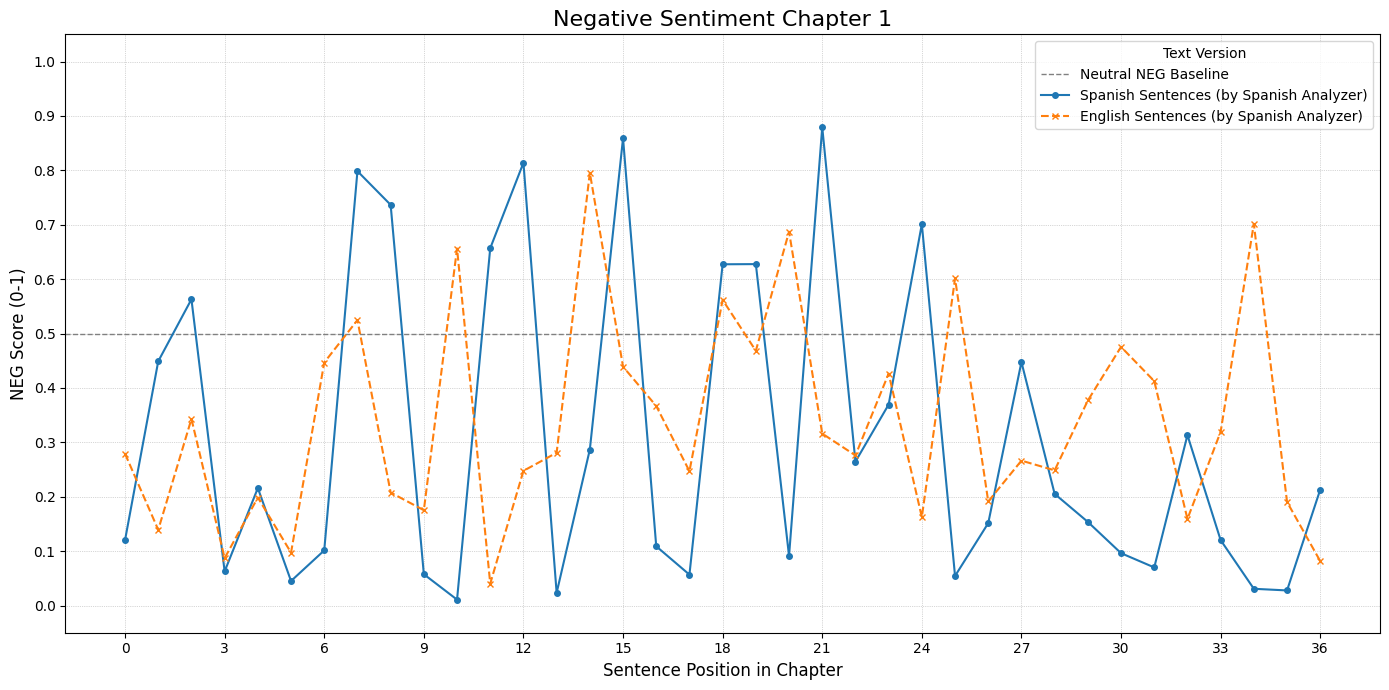

In [ ]:
create_plot(spanish_sentences, english_sentences, sentiment_chapt_esp, sentiment_chapt_engS, "Spanish Analyzer", "Negative Sentiment Chapter 1", "NEG", "3Way Spanish")

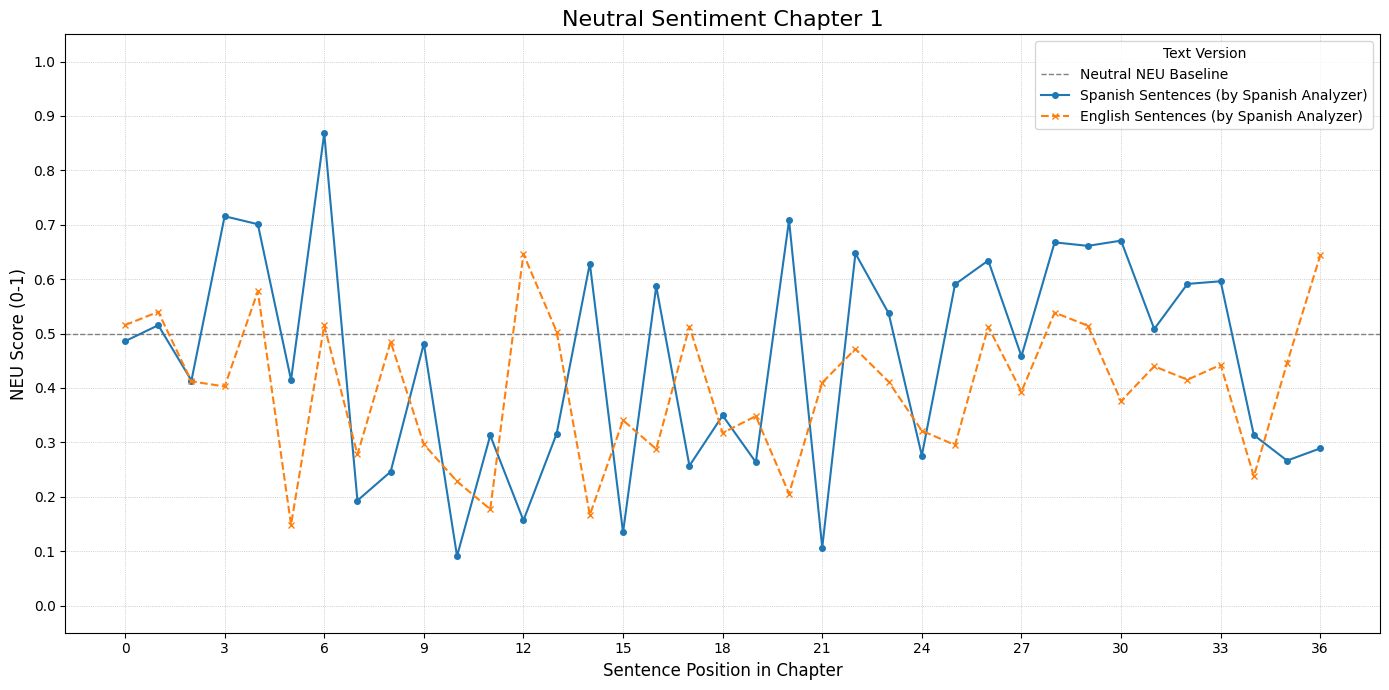

In [ ]:
create_plot(spanish_sentences, english_sentences, sentiment_chapt_esp, sentiment_chapt_engS, "Spanish Analyzer", "Neutral Sentiment Chapter 1", "NEU", "3Way Spanish")

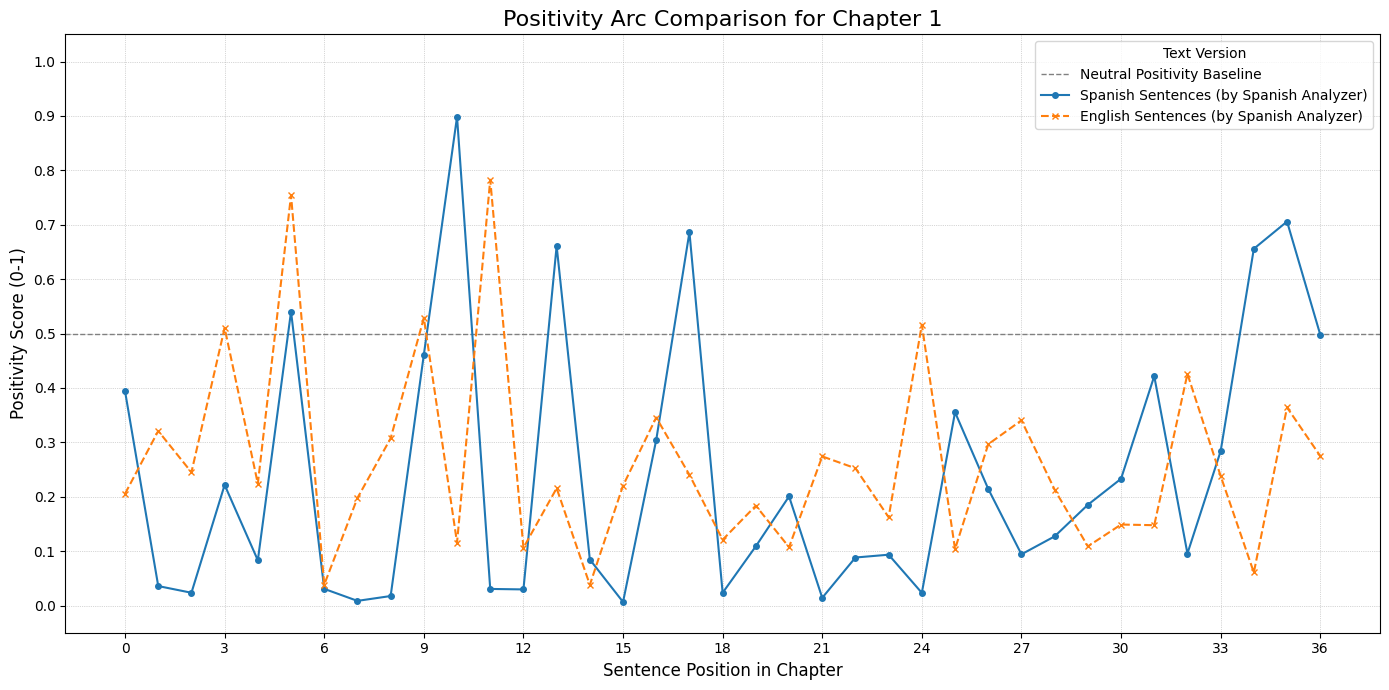

In [ ]:
# Before plotting, extract the positivity scores for each sentence
spanish_sentence_pos_scores = []
for sentence in spanish_sentences:
    spanish_sentence_pos_scores.append(sentiment_chapt_esp[sentence].probas['POS'])

english_sentence_pos_scores = []
for sentence in english_sentences:
    english_sentence_pos_scores.append(sentiment_chapt_engS[sentence].probas['POS'])

# Ensure they are of the same length for plotting and create x-axis values
min_len = min(len(spanish_sentence_pos_scores), len(english_sentence_pos_scores))
x_axis_indices = np.arange(min_len)

# creating plot
plt.figure(figsize=(14, 7))

# Add a horizontal line at y=0.5 (Neutral Positivity Baseline for a 0-1 scale)
plt.axhline(0.5, color='grey', linestyle='--', linewidth=1, label='Neutral Positivity Baseline')

chapter_title = "Chapter 1"
# Style the plot
plt.title(f'Positivity Arc Comparison for {chapter_title}', fontsize=16)
plt.xlabel('Sentence Position in Chapter', fontsize=12)
plt.ylabel('Positivity Score (0-1)', fontsize=12)

# Plot the scores
plt.plot(x_axis_indices, spanish_sentence_pos_scores[:min_len], label='Spanish Sentences (by Spanish Analyzer)', marker='o', markersize=4, linestyle='-')
plt.plot(x_axis_indices, english_sentence_pos_scores[:min_len], label='English Sentences (by Spanish Analyzer)', marker='x', markersize=4, linestyle='--')

plt.legend(title='Text Version')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

# Set x-ticks to show specific sentence numbers or dynamically adjust
plt.xticks(np.arange(0, min_len, max(1, min_len // 10))) # Adjust x-ticks dynamically
plt.yticks(np.arange(0, 1.1, 0.1)) # Positivity scores range from 0 to 1
plt.ylim(-0.05, 1.05) # Add slight padding to y-axis
plt.tight_layout()
plt.show()

* identify level of positive sentiment

In [ ]:
analyzer_english = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
results = analyzer_english("I love this!")


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
results = analyzer_english(english_sentences[3])
print(results)

[{'label': 'POSITIVE', 'score': 0.9983859062194824}]


In [ ]:
results[0]['score']

0.9983859062194824

In [ ]:
sentiment_chapt_eng = {}
result_total = 0
for sentence in tqdm.tqdm(english_sentences):
  #print(sentence)
  result = analyzer_english(english_sentences)
  sentiment_chapt_eng[sentence] = result #analyzer.predict(sentence).output
  result_total = result[0]['score'] + result_total

print()

result_avg = result_total/len(english_chapt)

print(f"English Positivity: {result_avg}")

100%|██████████| 37/37 [1:09:57<00:00, 113.44s/it]


English Positivity: 0.2542503579395024


In [ ]:
print(result)

[{'label': 'POSITIVE', 'score': 0.8726971745491028}, {'label': 'NEGATIVE', 'score': 0.983806848526001}, {'label': 'NEGATIVE', 'score': 0.9974068999290466}, {'label': 'POSITIVE', 'score': 0.9983859062194824}, {'label': 'POSITIVE', 'score': 0.9867543578147888}, {'label': 'POSITIVE', 'score': 0.996616780757904}, {'label': 'POSITIVE', 'score': 0.9851813316345215}, {'label': 'POSITIVE', 'score': 0.9978325963020325}, {'label': 'POSITIVE', 'score': 0.9969139099121094}, {'label': 'POSITIVE', 'score': 0.998285710811615}, {'label': 'NEGATIVE', 'score': 0.9961684346199036}, {'label': 'NEGATIVE', 'score': 0.9979634284973145}, {'label': 'POSITIVE', 'score': 0.9862260222434998}, {'label': 'POSITIVE', 'score': 0.9818257093429565}, {'label': 'NEGATIVE', 'score': 0.9948939085006714}, {'label': 'POSITIVE', 'score': 0.9981263279914856}, {'label': 'POSITIVE', 'score': 0.9957084655761719}, {'label': 'NEGATIVE', 'score': 0.9945321083068848}, {'label': 'POSITIVE', 'score': 0.998802900314331}, {'label': 'POSI

In [ ]:
print(english_sentences[3])
print(sentiment_chapt_eng[english_sentences[3]])
print(len(sentiment_chapt_eng[english_sentences[3]]))
print(  sentiment_chapt_eng[english_sentences[9]][0])
print(  sentiment_chapt_eng[english_sentences[9]][1]['score'])

The rest
of it went in a doublet of fine cloth and velvet breeches and shoes to
match for holidays, while on week-days he made a brave figure in his
best homespun.
[{'label': 'POSITIVE', 'score': 0.8726971745491028}, {'label': 'NEGATIVE', 'score': 0.983806848526001}, {'label': 'NEGATIVE', 'score': 0.9974068999290466}, {'label': 'POSITIVE', 'score': 0.9983859062194824}, {'label': 'POSITIVE', 'score': 0.9867543578147888}, {'label': 'POSITIVE', 'score': 0.996616780757904}, {'label': 'POSITIVE', 'score': 0.9851813316345215}, {'label': 'POSITIVE', 'score': 0.9978325963020325}, {'label': 'POSITIVE', 'score': 0.9969139099121094}, {'label': 'POSITIVE', 'score': 0.998285710811615}, {'label': 'NEGATIVE', 'score': 0.9961684346199036}, {'label': 'NEGATIVE', 'score': 0.9979634284973145}, {'label': 'POSITIVE', 'score': 0.9862260222434998}, {'label': 'POSITIVE', 'score': 0.9818257093429565}, {'label': 'NEGATIVE', 'score': 0.9948939085006714}, {'label': 'POSITIVE', 'score': 0.9981263279914856}, {'labe

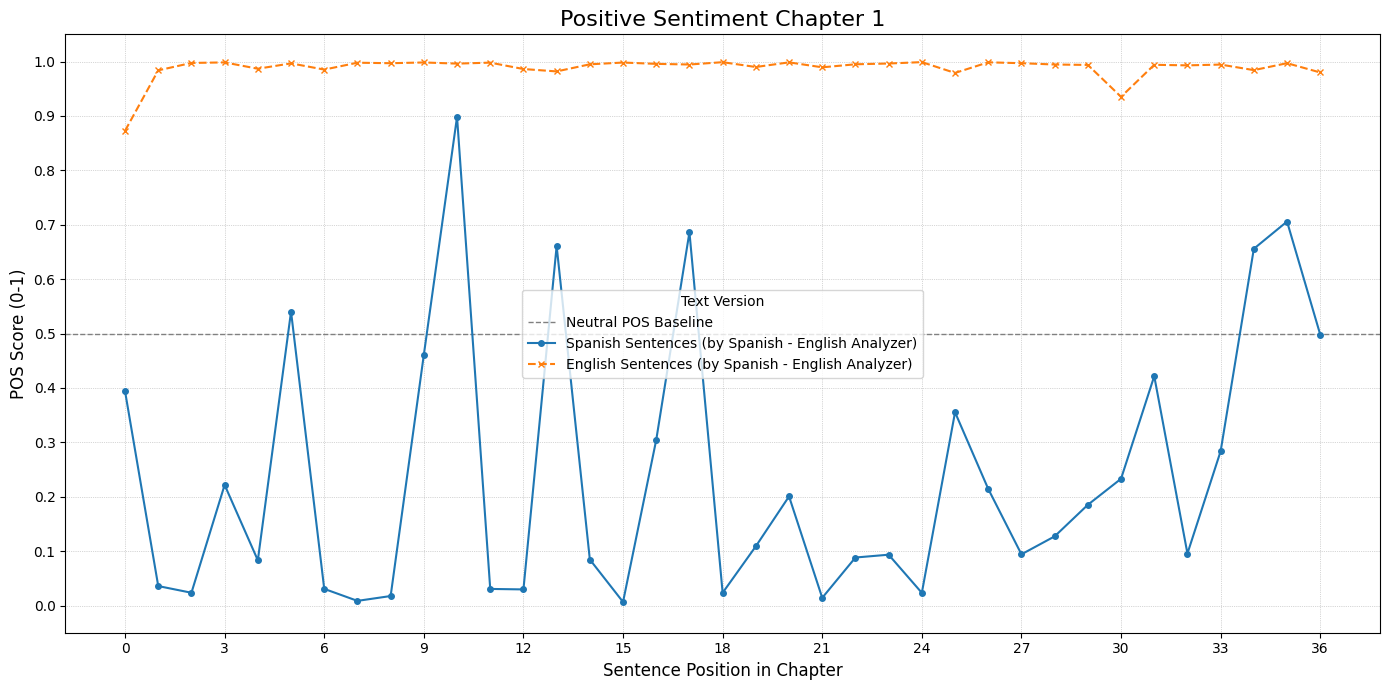

In [ ]:
create_plot(spanish_sentences, english_sentences, sentiment_chapt_esp, sentiment_chapt_eng, "Spanish - English Analyzer", "Positive Sentiment Chapter 1", "POS", "English Pos")

this one is a classifier; which is interesting
I wonder if I should try to use a sample from what we did in the homewor? See if they are group together since they are placed along those lines

In [ ]:
classifier_english = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", return_all_scores=True)

pytorch_model.bin:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
classifier_english("This is so nice!")

print("english sentence")
results = classifier_english(english_sentences[3])
print(results)
print(type(results))

english sentence
[[{'label': 'negative', 'score': 0.0004254345258232206}, {'label': 'neutral', 'score': 0.9903010129928589}, {'label': 'positive', 'score': 0.009273519739508629}]]
<class 'list'>


In [ ]:
print(results[0][2])
print(results[0][2]['score'])

{'label': 'positive', 'score': 0.009273519739508629}
0.009273519739508629


In [ ]:
english_classifier_neg = []
english_classifier_neu = []
english_classifier_pos = []

for sentence in tqdm.tqdm(english_sentences):
  result = classifier_english(sentence)
  english_classifier_neg.append(result[0][0]['score'])
  english_classifier_neu.append(result[0][1]['score'])
  english_classifier_pos.append(result[0][2]['score'])

print(len(english_classifier_neg))
print(len(english_classifier_neu))
print(len(english_classifier_pos))



100%|██████████| 37/37 [01:56<00:00,  3.14s/it]

37
37
37


In [ ]:
print(english_classifier_neu)

[0.9986984729766846, 0.9991896748542786, 0.9988646507263184, 0.9903010129928589, 0.9987030029296875, 0.9983556866645813, 0.999035120010376, 0.9979768395423889, 0.9961965084075928, 0.9793037176132202, 0.009011851623654366, 0.9956503510475159, 0.9977040886878967, 0.9977566599845886, 0.3949184715747833, 0.9958294034004211, 0.997702419757843, 0.9980565905570984, 0.23350556194782257, 0.09610112011432648, 0.003100235480815172, 0.9955184459686279, 0.9811941981315613, 0.9886261820793152, 0.005951738450676203, 0.997686505317688, 0.9978262782096863, 0.9933668971061707, 0.9927069544792175, 0.9985027313232422, 0.9983744621276855, 0.9980581402778625, 0.9981663823127747, 0.9978817105293274, 0.9974115490913391, 0.9973515272140503, 0.9965567588806152]


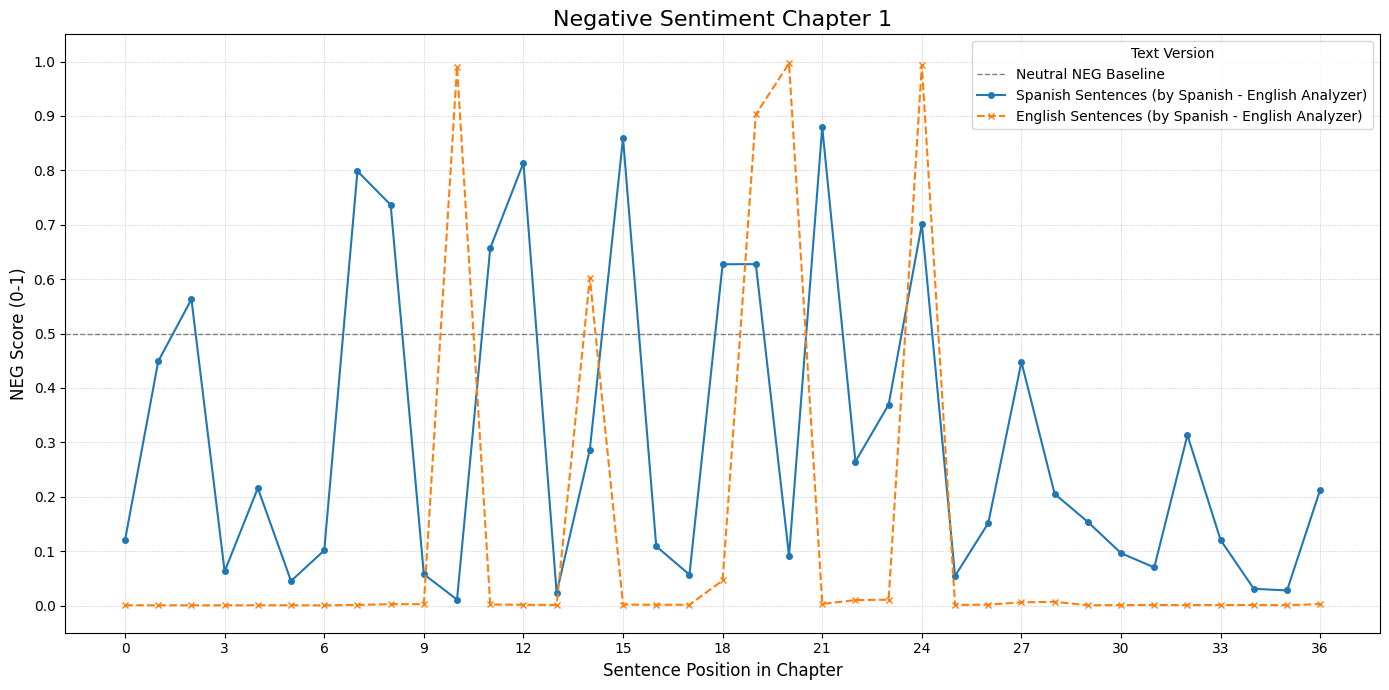

In [ ]:
create_plot(spanish_sentences, english_sentences, sentiment_chapt_esp, english_classifier_neg, "Spanish - English Analyzer", "Negative Sentiment Chapter 1", "NEG", "english classifier")

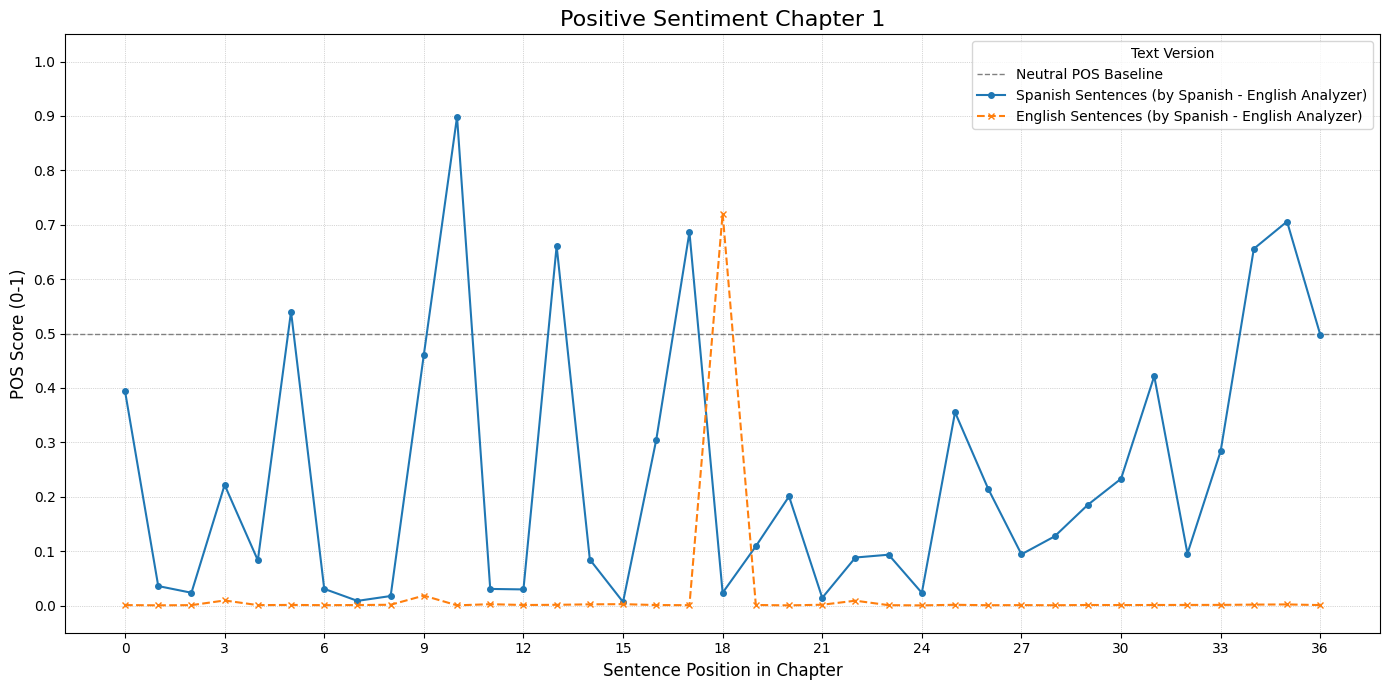

In [ ]:
create_plot(spanish_sentences, english_sentences, sentiment_chapt_esp, english_classifier_pos, "Spanish - English Analyzer", "Positive Sentiment Chapter 1", "POS", "english classifier")

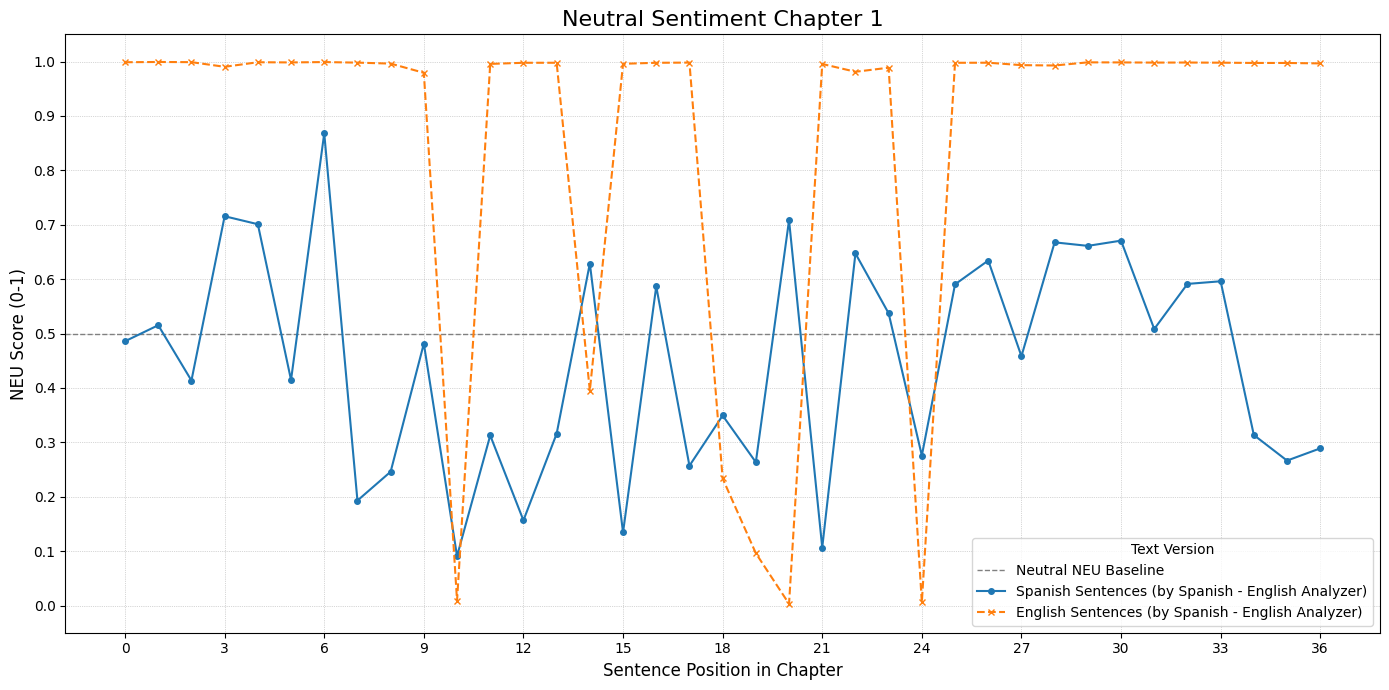

In [ ]:
create_plot(spanish_sentences, english_sentences, sentiment_chapt_esp, english_classifier_neu, "Spanish - English Analyzer", "Neutral Sentiment Chapter 1", "NEU", "english classifier")

* multi-language classifier

In [ ]:
from transformers import pipeline

# Load the classification pipeline with the specified model
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

# Classify a new sentence
sentence = "I love this product! It's amazing and works perfectly."
result = pipe(sentence)

# Print the result
print(result)


config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

[{'label': 'Very Positive', 'score': 0.558630645275116}]


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "tabularisai/multilingual-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def predict_sentiment(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    #print(probabilities)
    sentiment_map = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}
    return [sentiment_map[p] for p in torch.argmax(probabilities, dim=-1).tolist()]
    #value = torch.argmax(probabilities, dim=-1).tolist()
    #print(value)
    #return sentiment_map[v] for v in value

texts = [
    # English
    "I absolutely love the new design of this app!", "The customer service was disappointing.", "The weather is fine, nothing special.",
    # Chinese
    "这家餐厅的菜味道非常棒！", "我对他的回答很失望。", "天气今天一般。",
    # Spanish
    "¡Me encanta cómo quedó la decoración!", "El servicio fue terrible y muy lento.", "El libro estuvo más o menos.",
    # Arabic
    "الخدمة في هذا الفندق رائعة جدًا!", "لم يعجبني الطعام في هذا المطعم.", "كانت الرحلة عادية。",
    # Ukrainian
    "Мені дуже сподобалася ця вистава!", "Обслуговування було жахливим.", "Книга була посередньою。",
    # Hindi
    "यह जगह सच में अद्भुत है!", "यह अनुभव बहुत खराब था।", "फिल्म ठीक-ठाक थी।",
    # Bengali
    "এখানকার পরিবেশ অসাধারণ!", "সেবার মান একেবারেই খারাপ।", "খাবারটা মোটামুটি ছিল।",
    # Portuguese
    "Este livro é fantástico! Eu aprendi muitas coisas novas e inspiradoras.",
    "Não gostei do produto, veio quebrado.", "O filme foi ok, nada de especial.",
    # Japanese
    "このレストランの料理は本当に美味しいです！", "このホテルのサービスはがっかりしました。", "天気はまあまあです。",
    # Russian
    "Я в восторге от этого нового гаджета!", "Этот сервис оставил у меня только разочарование.", "Встреча была обычной, ничего особенного.",
    # French
    "J'adore ce restaurant, c'est excellent !", "L'attente était trop longue et frustrante.", "Le film était moyen, sans plus.",
    # Turkish
    "Bu otelin manzarasına bayıldım!", "Ürün tam bir hayal kırıklığıydı.", "Konser fena değildi, ortalamaydı.",
    # Italian
    "Adoro questo posto, è fantastico!", "Il servizio clienti è stato pessimo.", "La cena era nella media.",
    # Polish
    "Uwielbiam tę restaurację, jedzenie jest świetne!", "Obsługa klienta była rozczarowująca.", "Pogoda jest w porządku, nic szczególnego.",
    # Tagalog
    "Ang ganda ng lugar na ito, sobrang aliwalas!", "Hindi maganda ang serbisyo nila dito.", "Maayos lang ang palabas, walang espesyal.",
    # Dutch
    "Ik ben echt blij met mijn nieuwe aankoop!", "De klantenservice was echt slecht.", "De presentatie was gewoon oké, niet bijzonder.",
    # Malay
    "Saya suka makanan di sini, sangat sedap!", "Pengalaman ini sangat mengecewakan.", "Hari ini cuacanya biasa sahaja.",
    # Korean
    "이 가게의 케이크는 정말 맛있어요!", "서비스가 너무 별로였어요.", "날씨가 그저 그렇네요.",
    # Swiss German
    "Ich find dä Service i de Beiz mega guet!", "Däs Esä het mir nöd gfalle.", "D Wätter hüt isch so naja."
]

for text, sentiment in zip(texts, predict_sentiment(texts)):
    print(f"Text: {text}\nSentiment: {sentiment}\n")


[4, 1, 2, 3, 1, 2, 3, 1, 3, 4, 1, 2, 3, 1, 1, 4, 1, 3, 4, 1, 2, 3, 1, 3, 4, 1, 3, 3, 1, 3, 3, 1, 1, 4, 0, 1, 4, 1, 2, 3, 1, 3, 4, 1, 2, 3, 1, 3, 3, 1, 2, 3, 1, 2, 3, 1, 2]


TypeError: 'NoneType' object is not iterable

In [ ]:
def predict_sentiment(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_map = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}

    #return [sentiment_map[p] for p in torch.argmax(probabilities, dim=-1).tolist()]

    value_sentiments = torch.argmax(probabilities, dim=-1).tolist()
    return value_sentiments

In [ ]:
spanish_multi = predict_sentiment(spanish_sentences)
print(spanish_multi)
english = predict_sentiment(english_sentences)
print(english)

[2, 2, 2, 3, 2, 3, 1, 1, 4, 4, 4, 0, 1, 0, 1, 2, 4, 0, 1, 0, 3, 0, 3, 4, 0, 1, 0, 1, 3, 2, 0, 4, 0, 4, 0, 3, 2]
[2, 2, 2, 2, 2, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 4, 1, 3, 0, 3, 1, 3, 3, 1, 1, 1, 2, 2, 2, 1, 4, 1, 3, 3, 4, 3, 2]


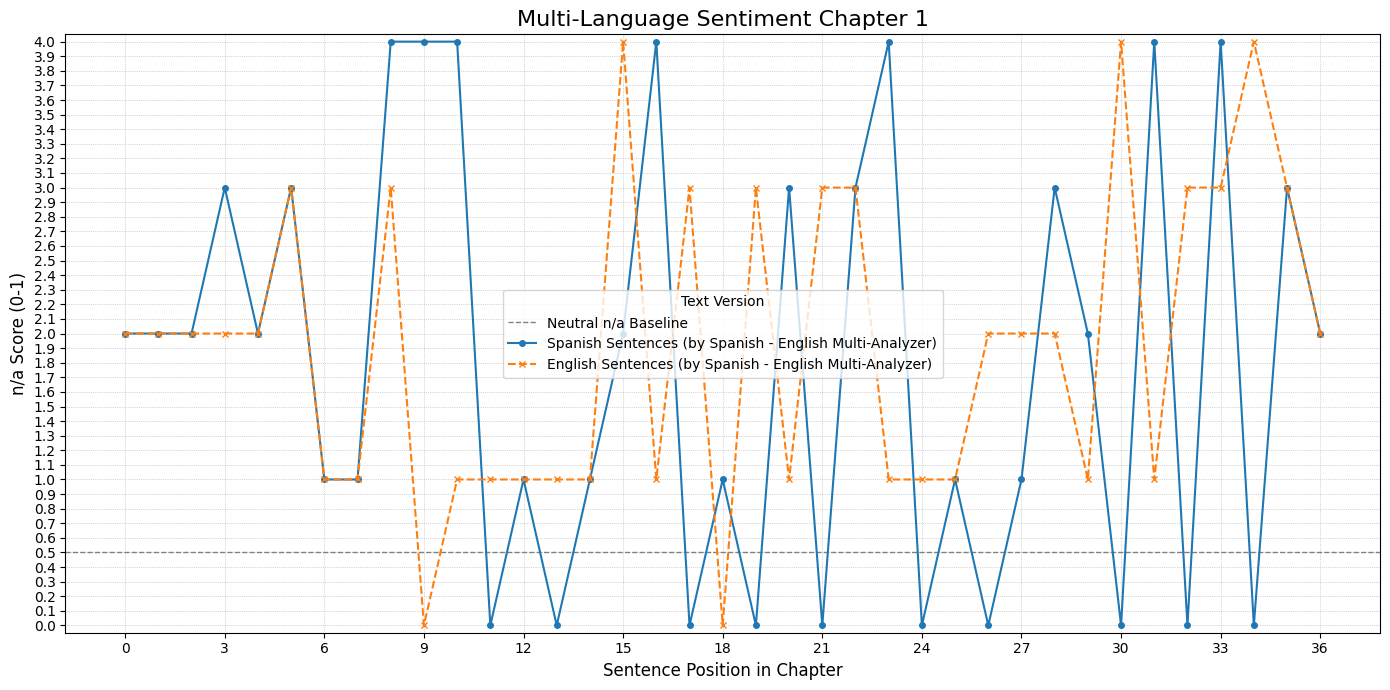

In [ ]:
create_plot(spanish_sentences, english_sentences,spanish_multi,english, "Spanish - English Multi-Analyzer", "Multi-Language Sentiment Chapter 1", "n/a", "multi-classifier")

In [ ]:
print(spanish_sentences[9])
print(english_sentences[9])

Y llegó a tanto su curiosidad
y desatino en esto, que vendió muchas hanegas de tierra de sembradura para
comprar libros de caballerías en que leer, y así, llevó a su casa todos
cuantos pudo haber dellos; y de todos, ningunos le parecían tan bien como
los que compuso el famoso Feliciano de Silva, porque la claridad de su
prosa y aquellas entricadas razones suyas le parecían de perlas, y más
cuando llegaba a leer aquellos requiebros y cartas de desafíos, donde en
muchas partes hallaba escrito: La razón de la sinrazón que a mi razón se
hace, de tal manera mi razón enflaquece, que con razón me quejo de la
vuestra fermosura.
But
of all there were none he liked so well as those of the famous
Feliciano de Silva’s composition, for their lucidity of style and
complicated conceits were as pearls in his sight, particularly when in
his reading he came upon courtships and cartels, where he often found
passages like “_the reason of the unreason with which my reason is
afflicted so weakens my reason 